In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the data
jdf=pd.read_csv('JEOPARDY_CSV.csv')
jdf.head(-10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216915,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$1,200",In his teens he worked in an assistant D.A.'s ...,(Erle Stanley) Gardner
216916,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,200","Oscar Wilde called this 4-letter word ""the cur...",work
216917,4999,5/11/2006,Double Jeopardy!,WORLD CAPITALS,"$3,400",Guyanese capital named for a Hanoverian monarch,Georgetown
216918,4999,5/11/2006,Double Jeopardy!,OFF-BROADWAY,"$1,600","A naughty 18th c. novel originally titled ""Mem...",Fanny Hill


In [4]:
jdf.shape

(216930, 7)

In [5]:
# replacing $ character with space so that the Value column can be treated mathematically later
jdf[' Value'] = jdf[' Value'].astype(str)
jdf[' Value'] = jdf[' Value'].str.replace("$","")

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_32672\3481127145.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jdf[' Value'] = jdf[' Value'].str.replace("$","")


In [6]:
# deleting the "," character in the ' Value' column so that it can be treated mathematically later
jdf[' Value'] = jdf[' Value'].replace(',','', regex=True)

In [7]:
jdf

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS",2000,In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [8]:
#replacing "None" values in the ' Value' column so that it can be treated mathematically later
jdf[' Value'] = jdf[' Value'].replace(['None'],'0')

In [9]:
#turning the items in the ' Value' column to integers
jdf[' Value'] = jdf[' Value'].astype(int)

In [10]:
#turning the values in the ' Air Date' column to datetime
jdf[' Air Date'] = pd.to_datetime(jdf[' Air Date'])

In [11]:
#checking whether they indeed turned to datetime
jdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Show Number  216930 non-null  int64         
 1    Air Date    216930 non-null  datetime64[ns]
 2    Round       216930 non-null  object        
 3    Category    216930 non-null  object        
 4    Value       216930 non-null  int32         
 5    Question    216930 non-null  object        
 6    Answer      216928 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 10.8+ MB


In [12]:
#parsing the datetime values into year, month and day
jdf['Date'] = jdf[' Air Date'].dt.strftime('%m-%d-%Y')

In [13]:
#creating a separate year column 
jdf['Year'] = jdf[' Air Date'].dt.strftime('%Y')

In [14]:
#turning years into integers so that they can be sorted 
jdf['Year'] = jdf['Year'].astype(int)

In [15]:
jdf.sort_values('Year')

,Show Number,Air Date,Round,Category,Value,Question,Answer,Date,Year
48803,61,1984-12-03,Jeopardy!,SPORTS,500,The number of laps run in the Indy 500,200,12-03-1984,1984
164696,3,1984-09-12,Jeopardy!,BROADWAY,500,100s of former cast members appeared onstage w...,A Chorus Line,09-12-1984,1984
127865,5,1984-09-14,Jeopardy!,AMERICAN LITERATURE,100,Melville's white whale tale,Moby Dick,09-14-1984,1984
127866,5,1984-09-14,Jeopardy!,ALL NUMBERS,100,"It was ""enough"" for Dick van Patten",Eight,09-14-1984,1984
127867,5,1984-09-14,Jeopardy!,RELIGION,100,Country that is home to Parsis & Sikhs,India,09-14-1984,1984
...,...,...,...,...,...,...,...,...,...
111209,6281,2012-01-02,Jeopardy!,RECENT BOOKS,800,"""Here Comes Trouble"", a look back by this pot-...",Michael Moore,01-02-2012,2012
111208,6281,2012-01-02,Jeopardy!,PREFIXES,1200,"""Anti-"" means ""against; ""ante-"" means this",before,01-02-2012,2012
111207,6281,2012-01-02,Jeopardy!,ARTHUR'S CAMELOT,800,"""The Simple Joys of Maidenhood"" is one of her ...",Guinevere,01-02-2012,2012
111205,6281,2012-01-02,Jeopardy!,"C.S., I",600,"Some say when it comes to his films ""Heathers""...",(Christian) Slater,01-02-2012,2012


In [16]:
#counting the number of shows per year
jdf.groupby('Year').count()["Show Number"]

Year
1984     1179
1985      888
1986     1409
1987     1275
1988     1290
1989     2067
1990     4337
1991     1444
1992     1885
1993     2132
1994     1136
1995     1138
1996     4891
1997    13099
1998    13143
1999    13540
2000    13439
2001    12097
2002     6859
2003     9426
2004    13190
2005    13560
2006    13726
2007    13940
2008    14036
2009    13579
2010    13756
2011    13376
2012     1093
Name: Show Number, dtype: int64

In [17]:
#checking that the total number of shows is equal to the number of lines
jdf.groupby('Year').count().sum()

Show Number    216930
 Air Date      216930
 Round         216930
 Category      216930
 Value         216930
 Question      216930
 Answer        216928
Date           216930
dtype: int64

In [18]:
#creating a separate month column 
jdf['Month'] = jdf[' Air Date'].dt.strftime('%m')

In [19]:
jdf.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Date,Year,Month
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus,12-31-2004,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12-31-2004,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona,12-31-2004,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12-31-2004,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12-31-2004,2004,12
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,200,"In the title of an Aesop fable, this insect sh...",the ant,12-31-2004,2004,12
6,4680,2004-12-31,Jeopardy!,HISTORY,400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,12-31-2004,2004,12
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,12-31-2004,2004,12
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400,"In the winter of 1971-72, a record 1,122 inche...",Washington,12-31-2004,2004,12
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,400,This housewares store was named for the packag...,Crate & Barrel,12-31-2004,2004,12


In [96]:
#what was the net winning per year
winnings=jdf.groupby('Year').sum()[' Value']
winnings

Year
1984      521450
1985      405500
1986      631805
1987      594183
1988      638005
1989      975055
1990     2075800
1991      686800
1992      883600
1993     1022702
1994      535805
1995      537611
1996     2302250
1997     6121870
1998     6160750
1999     6216883
2000     6220101
2001     6000350
2002     6449039
2003     8718705
2004    12430606
2005    12544291
2006    12680852
2007    12934429
2008    13135401
2009    12634032
2010    12805600
2011    12637425
2012     1024800
Name:  Value, dtype: int32

In [35]:
#was there a seasonality of net income of the winners
winnings_month=jdf.groupby('Month').sum()[" Value"]
winnings_month


Month
01    15705141
02    12900709
03    14743155
04    14546829
05    15832858
06    14759855
07    12027247
09    11624700
10    15237252
11    17693010
12    15454944
Name:  Value, dtype: int32

In [30]:
jdf.to_csv('jdf_tidy.csv')

Text(0.5, 1.0, 'Yearly winnings in Jeopardy 1984-2012')

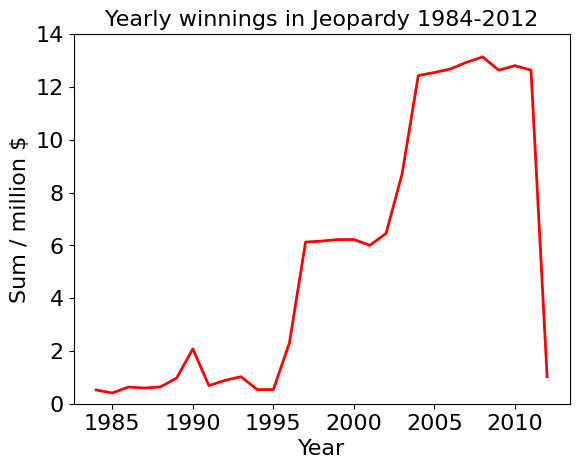

In [93]:
#how did the net winnings changed per year
fig, ax =plt.subplots ()
ax.plot(winnings.index, winnings.iloc[:]/1000000, c="red", linewidth=2)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sum / million $", fontsize=16)
ax.ticklabel_format(style='plain')
plt.ylim(0,14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Yearly winnings in Jeopardy 1984-2012', fontsize=16)

Text(0.5, 1.0, 'Monthly winnings in Jeopardy 1984-2012')

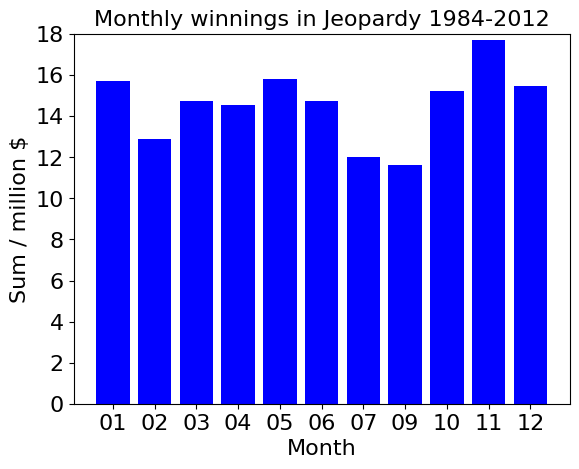

In [117]:
fig, ax =plt.subplots ()
ax.bar(winnings_month.index, winnings_month.iloc[:]/10**6, label="Sum", color="blue")
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Sum / million $", fontsize=16)
plt.ylim(0,18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly winnings in Jeopardy 1984-2012', fontsize=16)